In [159]:
pip install openpyxl

     -------------------------------------- 250.9/250.9 kB 3.0 MB/s eta 0:00:00
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [125]:
import pandas as pd
import numpy as np
from vali_tools.valitools import check_health
pd.set_option('display.max_column',None)
import datetime
import matplotlib.pyplot as plt


In [2]:
cyc = pd.read_csv(r"Source\Data\cycles.csv")
far = pd.read_csv(r"Source\Data\farms.csv")
fas = pd.read_csv(r"Source\Data\fasting.csv")
fas_s = pd.read_csv(r"Source\Data\fastings.csv")
fet = pd.read_csv(r"Source\Data\feed_tray.csv")
fee = pd.read_csv(r"Source\Data\feeds.csv")
har = pd.read_csv(r"Source\Data\harvests.csv")
mea = pd.read_csv(r"Source\Data\measurements.csv")
mor = pd.read_csv(r"Source\Data\mortalities.csv")
pon = pd.read_csv(r"Source\Data\ponds.csv")
sam = pd.read_csv(r"Source\Data\samplings.csv")

In [44]:
cyc.sample(5)

,cycle_id,pond_id,species_id,total_seed,started_at,finished_at,remark,created_at,updated_at,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,extracted_at,subscription_type,ordered_at,hatchery_id,total_seed_type,hatchery_name,pond_name,pond_length,pond_width,pond_depth,cyc_dur
750,19653,34695,2.0,300000,2022-12-20,2023-03-19,NaN,2022-11-25 06:54:25,2023-12-12 13:49:25,4999.9,0.0,1.25,114.0,55.0,2024-04-12 17:02:22,Free,NaT,1020.0,actual,MATERNIDADE NACALA,B01,70.71,70.71,1.5,89
1397,24303,34695,2.0,200000,2023-07-31,2023-10-24,NaN,2023-07-20 07:39:13,2023-12-27 18:37:18,4999.9,0.0,1.25,85.0,55.0,2024-04-12 17:02:22,Paid,NaT,1020.0,actual,MATERNIDADE NACALA,B01,70.71,70.71,1.5,85
552,16938,30387,1.0,320000,2022-06-30,2022-10-17,NaN,2022-06-30 06:48:57,2022-10-16 21:22:59,3000.0,0.0,1.25,130.0,50.0,2024-04-12 17:02:22,Free,NaT,1013.0,net,Benur TOP,A6,70.00,50.00,1.2,109
152,4038,14334,NaN,350000,2020-04-12,2020-07-15,NaN,2020-04-14 18:37:20,2020-07-15 06:25:23,2700.0,0.0,1.25,120.0,45.0,2024-04-12 17:02:22,Free,2020-04-14 18:37:20,NaN,NaN,NaN,A1,60.00,45.00,1.5,94
844,19519,34705,2.0,300000,2022-11-14,2023-01-27,NaN,2022-11-14 08:33:40,2023-01-30 08:57:22,2425.5,0.0,1.25,74.0,55.0,2024-04-12 17:02:22,Free,NaT,1020.0,actual,MATERNIDADE NACALA,C05,70.71,70.71,1.5,74


## Note Cycle
- id should be unique
- there are duplicate on id
- features: area, initial_age,species_id,subscription_type,cycle_dur(new)

In [43]:
# cyc treatment
cyc.id = cyc.id.astype(str) 
cyc.pond_id = cyc.pond_id.astype(str) 
cyc.species_id = cyc.species_id.astype(str)
cyc = cyc.drop_duplicates(subset='id')

cyc.started_at = pd.to_datetime(cyc.started_at)
cyc.finished_at = pd.to_datetime(cyc.finished_at)
cyc.created_at = pd.to_datetime(cyc.created_at)
cyc.updated_at = pd.to_datetime(cyc.updated_at)
cyc.extracted_at = pd.to_datetime(cyc.extracted_at)
cyc.ordered_at = pd.to_datetime(cyc.ordered_at)
cyc.finished_at.fillna(datetime.datetime.now(),inplace=True)

cyc.species_id = cyc.species_id.replace('nan',np.nan)

cyc['cyc_dur'] = cyc.finished_at - cyc.started_at
cyc['cyc_dur'] = cyc['cyc_dur'].astype(str)
cyc['cyc_dur'] = cyc['cyc_dur'].str.split(' ').str[0]
cyc['cyc_dur'] = cyc['cyc_dur'].astype(int)
cyc.rename(columns={'id':'cycle_id'},inplace=True)

C:\Users\kevin\AppData\Local\Temp\ipykernel_28692\3077323768.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyc.started_at = pd.to_datetime(cyc.started_at)
C:\Users\kevin\AppData\Local\Temp\ipykernel_28692\3077323768.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyc.finished_at = pd.to_datetime(cyc.finished_at)
C:\Users\kevin\AppData\Local\Temp\ipykernel_28692\3077323768.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [132]:
check_health(cyc)

,col_name,null_count,unique_count,row_count,dupe_count,null_pct,unique_pct,dupe_pct,mean,std,min,max,25_pct,50_pct,75_pct,col_types,mode,freq
0,cycle_id,0,2500,2500,0,0.0000,1.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,20849,1
1,pond_id,0,1675,2500,825,0.0000,0.6700,0.3300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,24569,8
2,species_id,790,2,2500,2498,0.3160,0.0008,0.9992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,1.0,1576
3,total_seed,0,868,2500,1632,0.0000,0.3472,0.6528,217154.5784,170662.188169,10.0,1800000.0,90000.0,184722.0,300000.0,numeric,NaN,NaN
4,started_at,0,750,2500,1750,0.0000,0.3000,0.7000,2022-10-27 02:43:00.479999744,NaN,2020-03-07 00:00:00,2024-02-18 00:00:00,2022-05-08 00:00:00,2022-11-16 00:00:00,2023-08-05 00:00:00,numeric,NaN,NaN
5,finished_at,0,858,2500,1642,0.0000,0.3432,0.6568,2023-01-13 23:23:43.568200192,NaN,2020-05-20 00:00:00,2024-09-04 00:35:20.500818,2022-07-16 18:00:00,2023-02-10 00:00:00,2023-10-26 00:00:00,numeric,NaN,NaN
6,remark,1172,67,2500,2433,0.4688,0.0268,0.9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,#SiklusFarm,269
7,created_at,0,2325,2500,175,0.0000,0.9300,0.0700,2022-11-10 21:50:26.408800,NaN,2020-02-19 08:44:53,2024-03-05 13:10:13,2022-05-17 04:53:08,2022-12-02 04:03:08,2023-08-10 03:05:55.750000128,numeric,NaN,NaN
8,updated_at,0,2289,2500,211,0.0000,0.9156,0.0844,2023-03-08 00:19:24.160000,NaN,2020-06-03 02:44:52,2024-04-09 00:06:26,2022-08-25 12:30:48.500000,2023-06-05 00:03:12,2023-11-20 07:32:10,numeric,NaN,NaN
9,area,0,648,2500,1852,0.0000,0.2592,0.7408,2233.092964,12372.846032,1.02,422500.0,803.84,1368.0,2238.6825,numeric,NaN,NaN


## Note fasting
- features: fasting

In [38]:
fast = pd.concat([fas,fas_s])

In [39]:
fast.logged_date = pd.to_datetime(fast.logged_date)
fast.cycle_id = fast.cycle_id.astype(str)
fast.fasting = fast.fasting.astype(str)
fast.cycle_id = fast.cycle_id.str.split('.').str[0]
fast.fasting = fast.fasting.str.split('.').str[0]
fast = fast.drop_duplicates(subset=['logged_date','cycle_id','fasting'])
fast.fasting.replace('nan','0',inplace=True)
fast.fasting = fast.fasting.astype(int)

fast_agg = fast.groupby(['cycle_id'],as_index=False).fasting.sum()

C:\Users\kevin\AppData\Local\Temp\ipykernel_28692\1786335512.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fast.fasting.replace('nan','0',inplace=True)


In [161]:
fast[fast.fasting ==1].sort_values(['cycle_id','logged_date'])#.to_excel('data.xlsx',index=False)

,logged_date,cycle_id,fasting
23935,2021-04-28,10000,1
23936,2021-04-29,10000,1
3688,2021-04-27,10006,1
3689,2021-04-28,10006,1
13345,2021-05-15,10009,1
...,...,...,...
14163,2021-04-11,9997,1
14164,2021-04-12,9997,1
18949,2021-04-27,9998,1
18951,2021-04-28,9998,1


In [ ]:
# Convert logged_date to datetime format
data['logged_date'] = pd.to_datetime(data['logged_date'])

# Sort the data by cycle_id and logged_date to ensure consecutive dates are ordered
data = data.sort_values(by=['cycle_id', 'logged_date'])

# Function to count consecutive dates for each cycle_id
def count_consecutive_dates(df):
    df['consecutive'] = df['logged_date'].diff().dt.days.eq(1).astype(int)
    df['consecutive_group'] = (df['consecutive'] == 0).cumsum()
    return df.groupby('consecutive_group')['logged_date'].count().reset_index(name='consecutive_days')

# Apply the function to each cycle_id group
consecutive_dates = data.groupby('cycle_id').apply(count_consecutive_dates).reset_index(drop=True)

consecutive_dates.head()

# Group by cycle_id and consecutive_group, then sum up the consecutive days
consecutive_days_per_cycle = data.groupby(['cycle_id']).apply(lambda x: (x['logged_date'].diff().dt.days == 1).sum()).reset_index(name='consecutive_days_count')

# Show the results
consecutive_days_per_cycle.head()



In [163]:
fast = fast[fast.fasting ==1]

In [164]:
# Function to count consecutive dates for each cycle_id
def count_consecutive_dates(df):
    df['consecutive'] = df['logged_date'].diff().dt.days.eq(1).astype(int)
    df['consecutive_group'] = (df['consecutive'] == 0).cumsum()
    return df.groupby('consecutive_group')['logged_date'].count().reset_index(name='consecutive_days')

In [167]:
consecutive_dates = fast.groupby('cycle_id',as_index=False).apply(count_consecutive_dates)

C:\Users\kevin\AppData\Local\Temp\ipykernel_28692\3612986705.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  consecutive_dates = fast.groupby('cycle_id',as_index=False).apply(count_consecutive_dates)


In [169]:
consecutive_days_per_cycle = fast.groupby(['cycle_id']).apply(lambda x: (x['logged_date'].diff().dt.days == 1).sum()).reset_index(name='consecutive_days_count')

C:\Users\kevin\AppData\Local\Temp\ipykernel_28692\3494069174.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  consecutive_days_per_cycle = fast.groupby(['cycle_id']).apply(lambda x: (x['logged_date'].diff().dt.days == 1).sum()).reset_index(name='consecutive_days_count')


In [170]:
consecutive_days_per_cycle

,cycle_id,consecutive_days_count
0,10000,1
1,10006,1
2,10009,1
3,10010,0
4,10018,0
...,...,...
1491,9993,3
1492,9994,2
1493,9996,2
1494,9997,2


In [151]:
cyc_fast = cyc.merge(fast_agg,how='left',on='cycle_id')

In [152]:
cyc_fast

,cycle_id,pond_id,species_id,total_seed,started_at,finished_at,remark,created_at,updated_at,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,extracted_at,subscription_type,ordered_at,hatchery_id,total_seed_type,hatchery_name,pond_name,pond_length,pond_width,pond_depth,cyc_dur,fasting
0,18876,36294,1.0,331920,2022-10-14,2023-01-29,NaN,2022-10-14 12:34:23,2023-01-30 01:46:27,4030.0,0.0,2.00,110.0,35.0,2024-04-12 17:02:22,Free,NaT,66.0,net,UD. Benur Ndaru Laut,H,65.00,62.00,1.0,107,22.0
1,22118,37102,1.0,40000,2023-04-26,2023-06-23,#TBR01,2023-04-30 22:28:13,2023-06-26 05:35:32,399.0,0.0,1.25,120.0,100.0,2024-04-12 17:02:22,Free,NaT,83.0,net,CV Raja Benur,A1,30.00,20.00,1.0,58,1.0
2,24088,39154,NaN,357570,2023-08-01,2023-10-18,#SiklusFarm,2023-07-12 01:13:05,2023-10-19 04:23:11,2000.0,0.0,1.25,120.0,20.0,2024-04-12 17:02:22,Free,2023-07-12 01:13:05,1004.0,gross,PT. Tri Karta Pratama - Total Kualitas Prima,A3,50.00,40.00,1.4,78,2.0
3,17743,20914,1.0,168275,2022-07-19,2022-09-29,#SiklusCustomerPermadi,2022-08-14 04:40:46,2022-10-06 00:09:36,1512.0,0.0,1.25,100.0,55.0,2024-04-12 17:02:22,Free,NaT,3.0,actual,PT. Central Proteinaprima Tbk,B4,54.00,28.00,1.5,72,0.0
4,17125,34187,1.0,188000,2022-07-07,2022-09-20,#SiklusTebar,2022-07-12 00:24:30,2022-10-15 04:27:24,1225.0,0.0,1.25,100.0,55.0,2024-04-12 17:02:22,Free,2022-07-12 00:24:30,35.0,net,PT Windu Alam Sentosa,A,35.00,35.00,1.2,75,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,19131,34712,2.0,300000,2022-10-25,2023-01-21,NaN,2022-10-25 10:13:31,2023-01-25 08:01:19,4999.9,0.0,1.25,88.0,55.0,2024-04-12 17:02:22,Free,NaT,1020.0,actual,MATERNIDADE NACALA,E01,70.71,70.71,1.5,88,0.0
2496,27552,45697,1.0,100000,2023-11-05,2024-02-13,#TBR03,2023-11-18 03:43:40,2024-03-27 02:52:36,900.0,0.0,1.25,120.0,55.0,2024-04-12 17:02:22,Free,2023-11-18 03:43:40,1022.0,net,Windu Segara Anyar,Kolam 4,45.00,20.00,1.5,100,14.0
2497,27885,24570,1.0,30716,2023-12-02,2024-02-29,#TBR05,2023-12-03 03:06:01,2024-03-03 03:03:26,86.0,0.0,1.25,120.0,20.0,2024-04-12 17:02:22,Free,NaT,83.0,gross,CV Raja Benur,Bagus,10.71,8.03,1.0,89,3.0
2498,15868,32398,1.0,150000,2022-04-28,2022-06-21,#SiklusTebar,2022-05-08 16:02:51,2022-08-23 03:12:20,1600.0,0.0,1.25,100.0,55.0,2024-04-12 17:02:22,Free,2022-05-08 16:02:51,35.0,gross,PT Windu Alam Sentosa,B 4.1,45.00,35.00,2.0,54,2.0


In [11]:
fet.sample(5)

,id,logged_at,feed_logged_at,cycle_id,tray_number,feed_remaining_percent,remark,created_at,updated_at,local_feed_logged_at
152796,194131,2023-10-29 14:00:00,2023-10-29 12:00:00,23710,1,66,"0,8% pakan",2023-10-29 11:41:36,2023-10-29 15:34:50,2023-10-29 21:00:00
73766,98486,2022-11-06 05:00:00,2022-11-06 03:00:00,18615,1,0,"Pakan di anco 0,5%",2022-11-08 03:55:03,2022-11-08 03:55:03,2022-11-06 12:00:00
142754,183148,2023-09-16 01:30:00,2023-09-15 23:30:00,23734,1,0,NaN,2023-09-18 02:52:13,2023-09-18 02:52:13,2023-09-16 08:30:00
51392,70127,2022-08-19 09:00:00,2022-08-19 08:00:00,16712,2,0,NaN,2022-08-19 10:11:13,2022-08-19 10:11:13,2022-08-19 16:00:00
132739,172336,2023-08-02 06:30:00,2023-08-02 03:30:00,23734,2,0,NaN,2023-08-02 11:16:53,2023-08-02 11:16:53,2023-08-02 13:30:00


In [12]:
check_health(fet)

,col_name,null_count,unique_count,row_count,dupe_count,null_pct,unique_pct,dupe_pct,mean,std,min,max,25_pct,50_pct,75_pct,col_types,mode,freq
0,id,0,186664,186664,0,0.000000,1.000000,0.000000,123263.899429,67748.121524,498.0,285950.0,63660.75,122951.5,180322.25,numeric,NaN,NaN
1,logged_at,0,16592,186664,170072,0.000000,0.088887,0.911113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,2022-06-12 00:30:00,125
2,feed_logged_at,0,15298,186664,171366,0.000000,0.081955,0.918045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,2022-06-23 00:00:00,224
3,cycle_id,0,709,186664,185955,0.000000,0.003798,0.996202,20091.738193,4137.425172,12163.0,29874.0,16162.00,19253.0,23739.00,numeric,NaN,NaN
4,tray_number,0,6,186664,186658,0.000000,0.000032,0.999968,1.950221,1.077650,1.0,6.0,1.00,2.0,3.00,numeric,NaN,NaN
5,feed_remaining_percent,0,3,186664,186661,0.000000,0.000016,0.999984,10.079935,19.511848,0.0,66.0,0.00,0.0,0.00,numeric,NaN,NaN
6,remark,140283,739,186664,185925,0.751527,0.003959,0.996041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,1% DARI PAKAN,2849
7,created_at,0,38870,186664,147794,0.000000,0.208235,0.791765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,2022-05-17 14:52:36,120
8,updated_at,0,38949,186664,147715,0.000000,0.208658,0.791342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,2022-05-18 13:27:06,120
9,local_feed_logged_at,0,16510,186664,170154,0.000000,0.088448,0.911552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,2022-07-08 07:30:00,124


In [13]:
fee.sample(5)

,cycle_id,logged_at,quantity
48070,24304,2023-10-23 05:00:00.000,8.0
248523,18253,2022-11-07 09:55:00.000,10.0
604693,20887,2023-03-26 08:00:00.000,3.1
361300,16051,2022-07-26 05:30:00.000,11.0
674390,27092,2023-10-26 10:00:30.000,30.0


In [14]:
check_health(fee)

,col_name,null_count,unique_count,row_count,dupe_count,null_pct,unique_pct,dupe_pct,mean,std,min,max,25_pct,50_pct,75_pct,col_types,mode,freq
0,cycle_id,0,2500,706908,704408,0.00000,0.003537,0.996463,21890.928919,5434.180295,3458.0,29874.0,18395.0,23633.0,27089.0,numeric,NaN,NaN
1,logged_at,21,74841,706908,632067,0.00003,0.105871,0.894129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,2023-10-12 23:00:00.000,576
2,quantity,21,6404,706908,700504,0.00003,0.009059,0.990941,17.064466,22.536168,-1.0,2011.0,4.0,10.0,22.0,numeric,NaN,NaN


In [49]:
fee[fee.cycle_id == 27092].head(20)

,cycle_id,logged_at,quantity
673778,27092,2023-08-25 23:00:00.000,3.0
673779,27092,2023-08-26 04:00:30.000,3.0
673780,27092,2023-08-26 23:00:00.000,3.0
673781,27092,2023-08-27 04:00:30.000,3.0
673782,27092,2023-08-27 23:00:00.000,3.0
673783,27092,2023-08-28 04:00:30.000,3.0
673784,27092,2023-08-28 23:00:00.000,3.0
673785,27092,2023-08-29 02:00:30.000,3.0
673786,27092,2023-08-29 04:00:30.000,3.0
673787,27092,2023-08-29 23:00:00.000,3.0


In [15]:
har.sample(5)

,cycle_id,updated_at,size,created_at,weight,id,harvested_at,status,selling_price
5805,16039.0,2022-08-19 04:30:01,48.00,2022-08-19 04:30:01,778.45,12617.0,2022-08-18,Full,NaN
4966,17743.0,2022-10-03 06:47:10,75.88,2022-10-03 06:47:10,58.28,13481.0,2022-09-29,Full,NaN
1649,9482.0,2021-06-27 08:57:50,200.00,2021-06-27 08:57:03,120.00,5714.0,2021-06-27,Full,120.0
7214,20531.0,2023-03-18 13:26:05,128.00,2023-03-18 13:26:05,10.90,16816.0,2023-03-18,Partial,654000.0
5437,18542.0,2022-12-22 07:40:24,230.00,2022-12-22 07:40:24,6.00,15297.0,2022-12-04,Failed,312000.0


In [16]:
check_health(har)

,col_name,null_count,unique_count,row_count,dupe_count,null_pct,unique_pct,dupe_pct,mean,std,min,max,25_pct,50_pct,75_pct,col_types,mode,freq
0,cycle_id,0,2490,8087,5597,0.000000,0.307902,0.692098,1.987177e+04,5.785357e+03,3458.0,2.987400e+04,16342.50,19672.0,2.474250e+04,numeric,NaN,NaN
1,updated_at,0,5892,8087,2195,0.000000,0.728577,0.271423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,2021-08-03 13:28:11,63
2,size,0,1481,8087,6606,0.000000,0.183133,0.816867,1.138034e+02,3.811497e+02,10.0,2.000000e+04,60.00,86.0,1.250000e+02,numeric,NaN,NaN
3,created_at,0,7098,8087,989,0.000000,0.877705,0.122295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,2021-07-12 12:53:37,40
4,weight,0,5109,8087,2978,0.000000,0.631755,0.368245,7.746361e+02,4.266748e+03,0.0,2.500000e+05,47.97,250.0,6.676950e+02,numeric,NaN,NaN
5,id,0,8076,8087,11,0.000000,0.998640,0.001360,1.730768e+04,6.714158e+03,2052.0,2.846800e+04,12549.50,16555.0,2.311150e+04,numeric,NaN,NaN
6,harvested_at,0,1069,8087,7018,0.000000,0.132187,0.867813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,2022-10-15,73
7,status,263,13,8087,8074,0.032521,0.001608,0.998392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,Partial,4192
8,selling_price,1793,4981,8087,3106,0.221714,0.615927,0.384073,3.181221e+07,1.646234e+08,0.0,1.125000e+10,298936.80,6247500.0,2.589123e+07,numeric,NaN,NaN


In [17]:
mea.sample(5)

,pond_id,cycle_id,measured_date,morning_temperature,evening_temperature,morning_do,evening_do,morning_salinity,evening_salinity,morning_pH,evening_pH,transparency,turbidity,ammonia,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,tom,total_plankton_
47532,39087,21203,2023-04-25,28.65,NaN,2.48,NaN,19.35,NaN,8.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51595,44540,29100,2023-08-21,32.00,NaN,4.60,NaN,36.00,NaN,9.00,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71040,46258,28067,2024-01-05,28.60,29.5,5.30,5.5,28.00,28.0,7.72,7.75,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136926,40661,25307,2023-09-15,NaN,NaN,NaN,NaN,NaN,NaN,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134682,45257,27088,2023-10-18,NaN,NaN,NaN,NaN,36.00,NaN,7.90,8.20,25.0,NaN,NaN,10.0,0.0,176.0,NaN,NaN,NaN,0.0,176.0,83.0,3290000.0


In [18]:
check_health(mea)

,col_name,null_count,unique_count,row_count,dupe_count,null_pct,unique_pct,dupe_pct,mean,std,min,max,25_pct,50_pct,75_pct,col_types,mode,freq
0,pond_id,0,1675,139050,137375,0.000000,0.012046,0.987954,32589.530004,1.022891e+04,1.000,4.728200e+04,30606.0000,34706.000,39152.000,numeric,NaN,NaN
1,cycle_id,0,2500,139050,136550,0.000000,0.017979,0.982021,20268.853290,5.401437e+03,3458.000,2.987400e+04,16776.0000,20197.000,24739.000,numeric,NaN,NaN
2,measured_date,0,1427,139050,137623,0.000000,0.010262,0.989738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,2023-10-11,343
3,morning_temperature,41855,4793,139050,134257,0.301007,0.034470,0.965530,28.580945,1.068968e+02,0.000,2.734100e+04,27.0000,28.000,29.000,numeric,NaN,NaN
4,evening_temperature,49839,5386,139050,133664,0.358425,0.038734,0.961266,29.908567,5.817013e+00,0.000,1.078933e+03,28.9000,30.000,31.000,numeric,NaN,NaN
5,morning_do,61324,6531,139050,132519,0.441021,0.046969,0.953031,5.904100,2.168104e+02,-52.885,6.004300e+04,4.2310,4.970,5.640,numeric,NaN,NaN
6,evening_do,65098,7706,139050,131344,0.468163,0.055419,0.944581,6.005278,3.044450e+01,-62.837,6.706000e+03,4.8310,5.640,6.500,numeric,NaN,NaN
7,morning_salinity,46388,19113,139050,119937,0.333607,0.137454,0.862546,22.777202,6.078861e+01,-25.000,1.573400e+04,16.8000,23.000,29.000,numeric,NaN,NaN
8,evening_salinity,73957,18407,139050,120643,0.531873,0.132377,0.867623,22.090321,1.526926e+02,0.000,3.395800e+04,15.6880,21.400,26.950,numeric,NaN,NaN
9,morning_pH,20115,3190,139050,135860,0.144660,0.022941,0.977059,8.006981,2.202525e+01,0.000,7.421000e+03,7.6150,7.900,8.120,numeric,NaN,NaN


In [19]:
mor.sample(5)

,id,cycle_id,quantity,recorded_at,created_at,updated_at,average_weight
1213,6619,15495,4695,2022-06-30,2022-07-02 07:50:45,2024-01-08 11:40:40,4.26
6048,13339,18675,72,2023-01-18,2023-01-25 15:08:17,2024-01-08 11:40:40,24.39
11094,20856,26245,60,2023-11-28,2023-12-06 08:07:46,2023-12-06 08:07:47,10.58
12624,23093,27729,140,2024-02-08,2024-02-14 18:26:02,2024-02-14 18:26:08,14.29
1916,7610,16469,1036,2022-07-23,2022-07-24 02:18:19,2024-01-08 11:40:40,1.93


In [20]:
check_health(mor)

,col_name,null_count,unique_count,row_count,dupe_count,null_pct,unique_pct,dupe_pct,mean,std,min,max,25_pct,50_pct,75_pct,col_types,mode,freq
0,id,0,13221,13221,0,0.0,1.000000,0.000000,14307.947810,5630.215217,185.0,26192.00,9763.00,13998.00,18858.00,numeric,NaN,NaN
1,cycle_id,0,857,13221,12364,0.0,0.064821,0.935179,20844.158763,4098.897296,7273.0,29579.00,17726.00,19676.00,24092.00,numeric,NaN,NaN
2,quantity,0,2538,13221,10683,0.0,0.191967,0.808033,1834.642085,87210.179102,1.0,10000000.00,60.00,200.00,756.00,numeric,NaN,NaN
3,recorded_at,0,896,13221,12325,0.0,0.067771,0.932229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,2023-10-13,55
4,created_at,0,11340,13221,1881,0.0,0.857726,0.142274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,2023-01-24 04:36:05,27
5,updated_at,0,1475,13221,11746,0.0,0.111565,0.888435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,2024-01-08 11:40:40,11713
6,average_weight,0,1984,13221,11237,0.0,0.150064,0.849936,9.613240,17.196472,0.0,1428.57,4.55,7.89,13.04,numeric,NaN,NaN


In [7]:
pon.sample(5)

,id,farm_id,length,width,deep,created_at,updated_at,record_id,extracted_at,max_seed_density
137,44616,12553,40.0,40.0,1.5,2023-10-14 03:18:54.000,2023-10-14 03:29:59.000,ponds_2024_4_12_44616,2024-04-12 17:02:11.000,NaN
121,44644,12559,50.0,50.0,2.0,2023-10-15 17:14:48.000,2023-10-15 17:14:48.000,ponds_2024_4_12_44644,2024-04-12 17:02:11.000,NaN
171,44726,12570,32.0,30.0,1.2,2023-10-17 09:27:41.000,2023-10-17 09:27:41.000,ponds_2024_4_12_44726,2024-04-12 17:02:11.000,104.166667
210,44725,12570,32.0,30.0,1.2,2023-10-17 09:27:41.000,2023-10-17 09:27:41.000,ponds_2024_4_12_44725,2024-04-12 17:02:11.000,104.166667
111,44715,12567,20.0,24.0,1.0,2023-10-16 10:53:04.000,2023-10-16 10:53:04.000,ponds_2024_4_12_44715,2024-04-12 17:02:11.000,72.916667


In [16]:
pon.farm_id = pon.farm_id.astype(str)
pon.id = pon.id.astype(str)

pon.created_at = pd.to_datetime(pon.created_at)
pon.updated_at = pd.to_datetime(pon.updated_at)
pon.extracted_at = pd.to_datetime(pon.extracted_at)

pon.length = pon.length.astype(float)
pon.width = pon.width.astype(float)
pon.deep = pon.deep.astype(float)
pon.max_seed_density = pon.max_seed_density.astype(float)

In [17]:
check_health(pon)

,col_name,null_count,unique_count,row_count,dupe_count,null_pct,unique_pct,dupe_pct,mean,std,min,max,25_pct,50_pct,75_pct,col_types,mode,freq
0,id,0,338,338,0,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,44982,1
1,farm_id,0,70,338,268,0.000000,0.207101,0.792899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,12560,20
2,length,23,69,338,269,0.068047,0.204142,0.795858,46.604698,37.879973,0.6,253.66,30.0,36.51,50.0,numeric,NaN,NaN
3,width,29,76,338,262,0.085799,0.224852,0.775148,29.845825,18.142403,0.45,190.24,20.0,30.0,40.0,numeric,NaN,NaN
4,deep,92,19,338,319,0.272189,0.056213,0.943787,7.133537,26.681219,0.9,150.0,1.0,1.3,1.6,numeric,NaN,NaN
5,created_at,0,142,338,196,0.000000,0.420118,0.579882,2022-11-04 01:41:20.437869824,NaN,2018-03-07 19:05:09,2024-02-29 05:51:20,2021-11-28 17:03:39,2023-10-13 06:03:30.500000,2023-10-16 06:46:15,numeric,NaN,NaN
6,updated_at,0,177,338,161,0.000000,0.523669,0.476331,2022-11-28 15:35:32.011834368,NaN,2018-03-15 00:46:10,2024-03-09 14:22:53,2021-11-29 06:03:56.750000128,2023-10-13 07:50:23.500000,2023-10-16 07:11:45.750000128,numeric,NaN,NaN
7,record_id,0,338,338,0,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,ponds_2024_4_12_44982,1
8,extracted_at,0,16,338,322,0.000000,0.047337,0.952663,2024-03-20 15:32:43.147929344,NaN,2021-09-19 17:02:16,2024-04-12 17:02:11,2024-04-12 17:02:11,2024-04-12 17:02:11,2024-04-12 17:02:11,numeric,NaN,NaN
9,max_seed_density,203,94,338,244,0.600592,0.278107,0.721893,248.67285,1077.046893,0.000625,12500.0,63.783784,120.0,185.205992,numeric,NaN,NaN


In [31]:
far.id = far.id.astype(str)
far['h_tz'] = far.timezone.str.replace('+','').str.split(':').str[0]
far['h_tz'] = far['h_tz'].astype(int)
far['mnt_tz'] = far.timezone.str.replace('+','').str.split(':').str[1]
far['mnt_tz'] = far['mnt_tz'].astype(int)
far.rename(columns={'id':'farm_id'},inplace=True)
pon_far = pon.merge(far,how='left',on='farm_id')


In [46]:
sam.sample(5)

,cycle_id,updated_at,sampled_at,created_at,average_weight,id,remark
14859,21995.0,2023-05-13 04:05:23,2023-04-30,2023-05-13 04:05:23,2.00,41657.0,NaN
123,24741.0,2023-10-18 07:00:04,2023-10-18,2023-10-18 07:00:04,6.30,50360.0,NaN
6163,24972.0,2023-10-11 09:34:04,2023-10-11,2023-10-11 09:34:04,2.44,49704.0,NaN
4245,22267.0,2023-08-03 14:11:14,2023-08-01,2023-08-03 14:11:14,13.60,45184.0,NaN
8603,17634.0,2022-09-28 09:03:10,2022-09-21,2022-09-21 05:34:24,2.44,31807.0,NaN


In [59]:
sam.loc[sam.sampled_at == '1-01-01','sampled_at'] = '2023-10-12'

sam.updated_at = pd.to_datetime(sam.updated_at,format="%Y-%m-%d %H:%M:%S")
sam.sampled_at = pd.to_datetime(sam.sampled_at,format="%Y-%m-%d")
sam.created_at = pd.to_datetime(sam.created_at,format="%Y-%m-%d %H:%M:%S")

sam.average_weight = sam.average_weight.astype(float)
sam.id = sam.id.astype(str)
sam.cycle_id = sam.cycle_id.astype(str)

sam.cycle_id = sam.cycle_id.str.split('.').str[0]
sam.id = sam.id.str.split('.').str[0]

In [72]:
#get last updated sampling record
sam.sort_values(by=['id','updated_at'],inplace=True)
sam.drop_duplicates(subset='id',keep='last',inplace=True)
#get cycle last sample
sam.sort_values(by=['cycle_id','sampled_at'],inplace=True)
sam.drop_duplicates(subset='cycle_id',keep='last',inplace=True)

In [82]:
sam

,cycle_id,updated_at,sampled_at,created_at,average_weight,id,remark
11319,10000,2021-12-02 02:41:31,2021-06-09,2021-06-15 06:51:59,4.4,14750,NaN
12368,10004,2021-05-29 03:14:05,2021-05-29,2021-05-29 03:14:05,4.4,14139,NaN
11567,10005,2021-12-02 03:52:17,2021-06-03,2021-12-02 03:52:17,5.0,21093,NaN
6460,10009,2021-07-21 15:17:33,2021-07-03,2021-07-21 15:17:33,5.6,16032,NaN
7825,10010,2021-09-11 07:52:25,2021-09-09,2021-09-11 07:52:25,28.0,18007,NaN
...,...,...,...,...,...,...,...
11063,9984,2021-07-24 03:46:14,2021-07-24,2021-07-24 03:46:14,11.3,16125,NaN
2558,9989,2021-07-30 15:24:15,2021-07-24,2021-07-30 15:24:08,11.2,16414,NaN
6740,9993,2021-08-21 14:17:32,2021-08-21,2021-08-21 14:17:32,18.4,17233,NaN
6461,9996,2021-06-03 14:14:19,2021-06-03,2021-06-03 14:14:19,11.2,14406,NaN


In [76]:
check_health(sam)

,col_name,null_count,unique_count,row_count,dupe_count,null_pct,unique_pct,dupe_pct,mean,std,min,max,25_pct,50_pct,75_pct,col_types,mode,freq
0,cycle_id,0,2307,15016,12709,0.000000,0.153636,0.846364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,20124,49
1,updated_at,0,10500,15016,4516,0.000000,0.699254,0.300746,2023-01-31 05:10:22.145178624,NaN,2020-05-02 14:16:40,2024-04-03 09:58:30,2022-08-15 04:21:55,2023-03-09 17:46:52.500000,2023-10-13 14:45:24,numeric,NaN,NaN
2,sampled_at,0,1220,15016,13796,0.000000,0.081247,0.918753,2023-01-21 02:41:41.012253696,NaN,2020-01-26 00:00:00,2024-04-10 00:00:00,2022-08-03 00:00:00,2023-02-27 00:00:00,2023-10-09 00:00:00,numeric,NaN,NaN
3,created_at,0,10443,15016,4573,0.000000,0.695458,0.304542,2023-01-30 18:13:29.949653760,NaN,2020-05-02 14:16:40,2024-04-03 09:58:30,2022-08-13 07:26:49.500000,2023-03-08 13:50:15.500000,2023-10-13 14:09:10.750000128,numeric,NaN,NaN
4,average_weight,0,2666,15016,12350,0.000000,0.177544,0.822456,9.903043,7.189043,0.01,100.0,4.4875,8.13,13.78,numeric,NaN,NaN
5,id,0,15016,15016,0,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,9966,1
6,remark,13687,1145,15016,13871,0.911494,0.076252,0.923748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,#BD-Katalis04,26


In [83]:
har.id = har.id.astype(str)
har.cycle_id = har.cycle_id.astype(str)

har.cycle_id = har.cycle_id.str.split('.').str[0]
har.id = har.id.str.split('.').str[0]

har.updated_at = pd.to_datetime(har.updated_at,format="%Y-%m-%d %H:%M:%S")
har.created_at = pd.to_datetime(har.created_at,format="%Y-%m-%d %H:%M:%S")
har.harvested_at = pd.to_datetime(har.harvested_at,format="%Y-%m-%d")
har.selling_price.fillna(0,inplace=True)

#get non failed harvest
har = har[har.status !='Failed']

In [102]:
har[har.status.isnull()].sample(15)

,cycle_id,updated_at,size,created_at,weight,id,harvested_at,status,selling_price
2018,15434,2022-06-26 06:55:19,62.00,2022-06-26 06:55:19,16.00,11240,2022-06-18,NaN,6.080000e+05
4211,19696,2023-02-24 03:59:52,60.00,2023-02-24 03:59:52,100.00,16511,2023-02-24,NaN,6.000000e+06
224,24191,2023-11-20 19:23:11,175.00,2023-11-20 19:23:11,217.00,24184,2023-11-07,NaN,6.510000e+06
5052,27707,2024-02-15 04:03:58,83.00,2024-02-15 04:03:58,28.15,26899,2024-02-07,NaN,1.052247e+06
6758,27699,2024-02-15 04:16:40,120.00,2024-02-15 04:16:40,57.91,26912,2024-02-08,NaN,1.864702e+06
2003,27700,2024-02-15 07:19:20,176.00,2024-02-15 07:19:20,22.00,26940,2024-01-08,NaN,4.400000e+05
3259,27708,2024-02-15 04:20:51,105.00,2024-02-15 04:20:51,7.00,26922,2024-02-08,NaN,2.100000e+04
3758,27698,2024-02-15 04:12:15,98.00,2024-02-15 04:12:15,300.73,26905,2024-02-08,NaN,7.578396e+06
4199,27694,2024-02-15 03:36:01,123.00,2024-02-15 03:36:01,857.65,26880,2024-02-07,NaN,3.893740e+07
2624,26445,2024-04-05 02:46:09,70.49,2024-04-05 02:46:09,128.23,28370,2024-04-01,NaN,7.421568e+06


In [107]:
har[har.id.duplicated()]

,cycle_id,updated_at,size,created_at,weight,id,harvested_at,status,selling_price
1192,17306,2022-08-13 05:31:53,190.0,2022-07-03 13:54:32,288.71,11383,2022-06-21,Full,0.0
2074,15006,2022-06-19 08:28:04,58.0,2022-06-19 08:28:04,450.00,11107,2022-06-17,Full,27180000.0
2858,16424,2022-08-01 04:03:13,74.0,2022-07-24 13:29:54,200.00,12090,2022-07-28,Full,13000000.0
4468,15507,2022-10-06 05:25:48,97.2,2022-06-21 03:45:11,241.62,11158,2022-06-18,Partial,12216307.2
4469,15507,2022-10-06 05:25:49,97.2,2022-06-21 13:36:12,13.49,11168,2022-06-18,Partial,269800.0
5212,18739,2022-10-30 01:17:14,62.0,2022-10-20 01:03:52,4879.00,13875,2022-10-26,Full,0.0
5988,15756,2022-07-01 00:31:00,67.0,2022-06-23 02:56:17,200.00,11185,2022-06-23,Partial,0.0
6103,14439,2022-04-21 23:38:12,70.0,2022-04-21 03:35:44,5.00,10343,2022-04-20,Full,0.0
7353,18746,2022-10-20 01:08:08,79.2,2022-10-20 01:03:52,5566.89,13875,2022-10-19,Full,0.0
7512,17042,2022-07-12 07:44:06,53.0,2022-07-06 07:06:33,503.00,11528,2022-06-24,Full,0.0


In [111]:
har['avg_weight_har'] = 1000/har['size']

C:\Users\kevin\AppData\Local\Temp\ipykernel_28692\1079301607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  har['avg_weight_har'] = har['size'] * har['weight']/har['weight']


In [136]:
har_agg = har.groupby('cycle_id',as_index=False).agg({'weight':'sum','size':'mean','updated_at':'max','selling_price':'sum'})
har_agg['avg_weight_har'] = 1000/har_agg['size'] 

In [137]:
sam_har = har_agg.merge(sam,how='left',on='cycle_id')

In [140]:
sam_har[sam_har.average_weight.notnull()].average_weight.corr(sam_har[sam_har.average_weight.notnull()].avg_weight_har,method='pearson')

np.float64(0.5399475743493316)

<Axes: xlabel='average_weight', ylabel='avg_weight_har'>

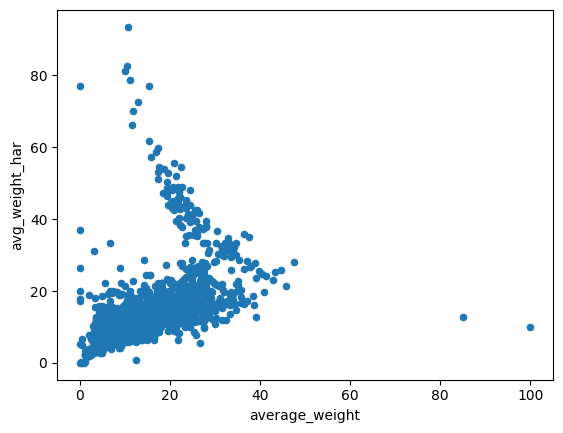

In [144]:
sam_har.plot.scatter(x='average_weight',y='avg_weight_har')

In [145]:
sam_har[sam_har.average_weight == 100]

,cycle_id,weight,size,updated_at_x,selling_price,avg_weight_har,updated_at_y,sampled_at,created_at,average_weight,id,remark
395,15814,300.0,100.0,2022-07-11 06:15:45,54000.0,10.0,2022-07-19 10:30:11,2022-05-09,2022-07-19 10:30:11,100.0,29060,NaN
